# Bike Rental Prediction

## Introduction

### Problem Statement
##### The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

### Data
##### The details of data attributes in the dataset are as follows
1. nstant: Record index
2. dteday: Date
3. season: Season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr: Year (0: 2011, 1:2012)
5. mnth: Month (1 to 12)
6. hr: Hour (0 to 23)
7. holiday: weather day is holiday or not (extracted fromHoliday Schedule)
8. weekday: Day of the week
9. workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit: (extracted fromFreemeteo) 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered


In [1]:
import os
import pandas as pd
import numpy as np

os.chdir("C:/Users/Aditya Kapoor/Desktop/Data Science Upskilling/Project 2 Bike Rental Prediction/Data")
os.getcwd()

'C:\\Users\\Aditya Kapoor\\Desktop\\Data Science Upskilling\\Project 2 Bike Rental Prediction\\Data'

In [2]:
#load raw dataset
bike_rental_raw = pd.read_csv("day.csv",parse_dates=['dteday'])
print(bike_rental_raw.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
# We see that the dataset is already pretty good and dosent require a lot of pre processing. 
#In addition to the existing columns, we would be needing columns like month end and long weekend
# We will then try to find useful insights by these columns to see if they have an impact
bike_rental_features = bike_rental_raw.copy()
## Month End

bike_rental_features['Day'] = pd.DatetimeIndex(bike_rental_features['dteday']).day
mend_dates = [25,26,27,28,29,30,31]
for i in range(bike_rental_features.shape[0]):
    bike_rental_features.loc[i,'Month_End'] = np.where(bike_rental_features.loc[i,'Day'] in mend_dates,1,0)
    
print(bike_rental_features.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  Day  Month_End  
0   985    1        0.0  
1   801    2        0.0  
2  1349    3  

In [4]:
bike_rental_features.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Day           0
Month_End     0
dtype: int64

## Data Exploration

In [5]:
bike_rental_insights = bike_rental_features.copy()

# We see that the variables are already scaled and ecoded. However, in order to understand the data, we would like to use more readable lables.

season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_map = {0:2011,1:2012}
# Month and day can be comprehended easily
month_map = {1: 'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
weekday_map = {0:'Sun',1:'Mon',2:'Tue', 3: 'Wed', 4: 'Thu',5:'Fri',6:'Sat'}
weathersit_map = {1: 'Clear, Few Clouds', 2: 'Mist, Cloudy, less clouds', 3: 'Light Rain, Snow, Thunderstorm, Clouds', 4: 'Heavy Rain, Ice,Fog'}
map_lis = [season_map,yr_map,month_map,weekday_map,weathersit_map]
categorical_vars = ['season','yr','mnth','weekday','weathersit']
for i in range(len(categorical_vars)):
    bike_rental_insights[categorical_vars[i]] = bike_rental_insights[categorical_vars[i]].map(map_lis[i])

# transforming continuous vars
def inverse_transform(df,col,maxi,mini):
    m = 1/(maxi-mini)
    c = -mini*m
    return((df[col]-c)/m)
    
cont_vars = ['temp','atemp','hum','windspeed']
mini = [-8,-16,0,0]
maxi = [39,50,100,67]

for j,i in enumerate(cont_vars):
    bike_rental_insights[i] = inverse_transform(bike_rental_insights,i,maxi[j],mini[j])

bike_rental_insights.head()
    
    

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day,Month_End
0,1,2011-01-01,spring,2011,Jan,0,Sat,0,"Mist, Cloudy, less clouds",8.175849,7.999250,80.5833,10.749882,331,654,985,1,0.0
1,2,2011-01-02,spring,2011,Jan,0,Sun,0,"Mist, Cloudy, less clouds",9.083466,7.346774,69.6087,16.652113,131,670,801,2,0.0
2,3,2011-01-03,spring,2011,Jan,0,Mon,1,"Clear, Few Clouds",1.229108,-3.499270,43.7273,16.636703,120,1229,1349,3,0.0
3,4,2011-01-04,spring,2011,Jan,0,Tue,1,"Clear, Few Clouds",1.400000,-1.999948,59.0435,10.739832,108,1454,1562,4,0.0
4,5,2011-01-05,spring,2011,Jan,0,Wed,1,"Clear, Few Clouds",2.666979,-0.868180,43.6957,12.522300,82,1518,1600,5,0.0


# Drawing Insights

### We would like to see insights by following:
1. Year
2. Season
3. Working Day
4. Month
5. weathersit
6. temp
7. humidity
8. windspeed

In [6]:
count_by_year = pd.concat([bike_rental_insights.groupby('yr')['cnt'].sum(),bike_rental_insights.groupby('yr')['cnt'].mean(),bike_rental_insights.groupby('yr')['cnt'].median()],axis=1)
count_by_year.columns = ['Total Rentals','Average Rentals per Day','Median Rentals per Day']
count_by_year
# Clealry, Sales in 2012 are much higher than 2011. 
# It makes more sense to look at all metrics by year. From now on, we would only look at average

,Total Rentals,Average Rentals per Day,Median Rentals per Day
yr,,,
2011,1243103,3405.761644,3740
2012,2049576,5599.934426,5927


season,fall,spring,summer,winter
yr,,,,
2011,4464.361702,1666.666667,3775.173913,3664.460674
2012,6824.244681,3531.296703,6209.489130,5791.865169


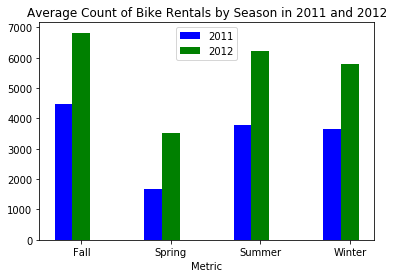

In [7]:
# Metrics by season and year
import matplotlib.pyplot as plt
count_by_season_year = pd.DataFrame(bike_rental_insights.groupby(['yr','season'])['cnt'].mean()).reset_index()
count_by_season = count_by_season_year.pivot(index = 'yr',columns = 'season', values= 'cnt')

index = np.arange(4)
bar_width=.2
b1=plt.bar(index,count_by_season.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_season.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Season in 2011 and 2012")
plt.xticks(index + bar_width, ('Fall', 'Spring', 'Summer', 'Winter'))
plt.legend(loc=9)

count_by_season


workingday,0,1
yr,,
2011,3363.817391,3425.056
2012,5288.189655,5744.584


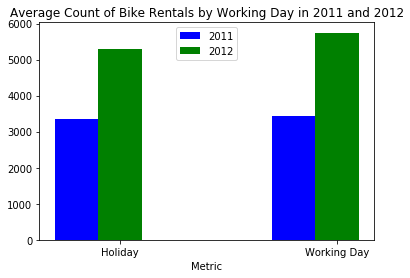

In [8]:
# Metrics by working day

count_by_wd_year = pd.DataFrame(bike_rental_insights.groupby(['yr','workingday'])['cnt'].mean()).reset_index()
count_by_wd = count_by_wd_year.pivot(index = 'yr',columns = 'workingday', values= 'cnt')

index = np.arange(2)
bar_width=.2
b1=plt.bar(index,count_by_wd.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_wd.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Working Day in 2011 and 2012")
plt.xticks(index + bar_width, ('Holiday','Working Day'))
plt.legend(loc=9)

count_by_wd





weathersit,"Clear, Few Clouds","Light Rain, Snow, Thunderstorm, Clouds","Mist, Cloudy, less clouds"
yr,,,
2011,3694.986726,1674.133333,3088.096774
2012,6003.734177,2126.166667,4991.333333


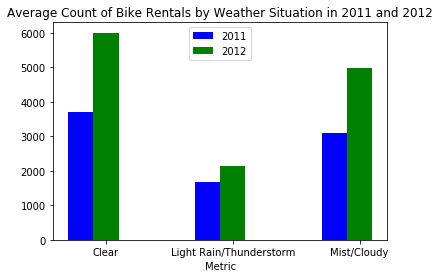

In [9]:
# Metrics by weathersit

count_by_wsit_year = pd.DataFrame(bike_rental_insights.groupby(['yr','weathersit'])['cnt'].mean()).reset_index()
count_by_wsit = count_by_wsit_year.pivot(index = 'yr',columns = 'weathersit', values= 'cnt')

index = np.arange(3)
bar_width=.2
b1=plt.bar(index,count_by_wsit.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_wsit.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Weather Situation in 2011 and 2012")
plt.xticks(index + bar_width, ('Clear','Light Rain/Thunderstorm','Mist/Cloudy'))
plt.legend(loc=9)

count_by_wsit

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Day,Month_End,temp_bucket,hum_bucket,windspeed_bucket
0,1,2011-01-01,spring,2011,Jan,0,Sat,0,"Mist, Cloudy, less clouds",8.175849,...,80.5833,10.749882,331,654,985,1,0.0,Low,High,Pleasent
1,2,2011-01-02,spring,2011,Jan,0,Sun,0,"Mist, Cloudy, less clouds",9.083466,...,69.6087,16.652113,131,670,801,2,0.0,Low,Pleasent,High
2,3,2011-01-03,spring,2011,Jan,0,Mon,1,"Clear, Few Clouds",1.229108,...,43.7273,16.636703,120,1229,1349,3,0.0,Low,Pleasent,High
3,4,2011-01-04,spring,2011,Jan,0,Tue,1,"Clear, Few Clouds",1.400000,...,59.0435,10.739832,108,1454,1562,4,0.0,Low,Pleasent,Pleasent
4,5,2011-01-05,spring,2011,Jan,0,Wed,1,"Clear, Few Clouds",2.666979,...,43.6957,12.522300,82,1518,1600,5,0.0,Low,Pleasent,Pleasent


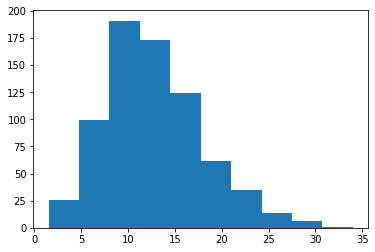

In [10]:
# We'll need to make buckets for tempearure, humidity and windspeed #temp #hum
plt.hist(bike_rental_insights['windspeed'])
med = [15,40,5]
maxi = [27,75,15]
metrics = ['temp','hum','windspeed']

for i,j in enumerate(metrics):
    col = j+'_bucket'
    bike_rental_insights[col] = np.where(bike_rental_insights[j]<med[i],"Low",np.where(bike_rental_insights[j]<maxi[i],'Pleasent','High'))

bike_rental_insights.head()


temp_bucket,High,Low,Pleasent
yr,,,
2011,4281.137931,2426.913514,4436.894040
2012,6430.906250,4350.068571,6808.333333


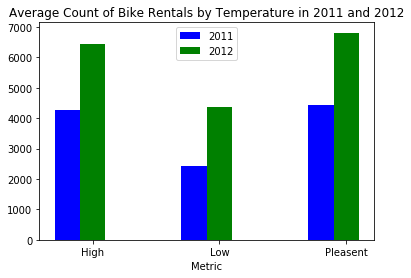

In [11]:
# Metrics by temp

count_by_temp_year = pd.DataFrame(bike_rental_insights.groupby(['yr','temp_bucket'])['cnt'].mean()).reset_index()
count_by_temp = count_by_temp_year.pivot(index = 'yr',columns = 'temp_bucket', values= 'cnt')

index = np.arange(3)
bar_width=.2
b1=plt.bar(index,count_by_temp.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_temp.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Temperature in 2011 and 2012")
plt.xticks(index + bar_width, ('High','Low','Pleasent'))
plt.legend(loc=9)

count_by_temp

hum_bucket,High,Low,Pleasent
yr,,,
2011,3016.870588,2781.583333,3557.052239
2012,4576.523810,5448.352941,5834.381119


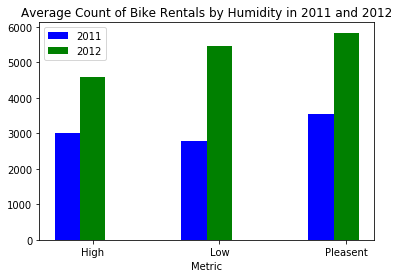

In [12]:
# Metrics by humidity

count_by_hum_year = pd.DataFrame(bike_rental_insights.groupby(['yr','hum_bucket'])['cnt'].mean()).reset_index()
count_by_hum = count_by_hum_year.pivot(index = 'yr',columns = 'hum_bucket', values= 'cnt')

index = np.arange(3)
bar_width=.2
b1=plt.bar(index,count_by_hum.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_hum.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Humidity in 2011 and 2012")
plt.xticks(index + bar_width, ('High','Low','Pleasent'))
plt.legend(loc=2)

count_by_hum

windspeed_bucket,High,Low,Pleasent
yr,,,
2011,2966.669565,3668.833333,3603.004310
2012,5193.471154,6045.000000,5746.465863


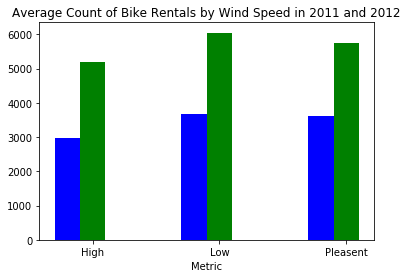

In [13]:
# Metrics by windspeed

count_by_wind_year = pd.DataFrame(bike_rental_insights.groupby(['yr','windspeed_bucket'])['cnt'].mean()).reset_index()
count_by_wind = count_by_wind_year.pivot(index = 'yr',columns = 'windspeed_bucket', values= 'cnt')

index = np.arange(3)
bar_width=.2
b1=plt.bar(index,count_by_wind.iloc[0,:].values,color='b',label='2011',width=bar_width)
b2=plt.bar(index+bar_width,count_by_wind.iloc[1,:].values,color='g',label='2012',width=bar_width)

plt.xlabel("Metric")
plt.title("Average Count of Bike Rentals by Wind Speed in 2011 and 2012")
plt.xticks(index + bar_width, ('High','Low','Pleasent'))
#plt.legend(loc=9)

count_by_wind

## Insights
1. We see that 2012 has a higher count of rentals in all seasons.
2. Among seasons, highest count of rentals is in Fall, while the lowest is in Spring (Season 1) 
3. We do not see a major diference between rentals on Working Days/Holidays. However, rentals on Working Days are slightly higher.
4. As per expectations, average count of bike rental is highest when the weather is clear and lowest during rains and thunderstorms.
5. We see that more people prefer to rent a bike when the temperature is high than when it is low.
6. There are more number of rentals when humidity is moderate/low than when it is high
7. Count of Rentals is highest when the wind speed is low


# Feature Selection

In [14]:
# Correlation Analysis
bike_rental_features.corr().drop(['instant','casual','registered','Day'], axis=0).drop(['instant','casual','registered','Day'], axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Month_End
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100,0.006121
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710,0.002637
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977,0.011085
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348,-0.009072
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443,-0.004303
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156,0.007061
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391,-0.026300
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494,0.019858
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066,0.013039
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659,-0.005944


### We see that:
1. Season is highly corelated with month
2. Year is highly corelated with instant
3. Temp is highly corelated with atemp

In [15]:
# Before we start our analysis, we would like to drop redundant or highly corelated varibales
bike_rental_features.head()
bike_rental_rel = bike_rental_features.copy()

bike_rental_rel.drop(['dteday','instant','holiday','atemp','casual','registered','Day' ],axis=1,inplace=True)

bike_rental_rel.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt', 'Month_End'],
      dtype='object')

In [16]:
X = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'Month_End']
Y = [ 'cnt']

from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_rental_rel,test_size=0.2,random_state=1024)


# Model Building

### We would be building the following models:

1. Linear Regression
2. Ridge Regression
3. Decision Tree
4. Random Forest

In [17]:
# 1. Linear Regression Model
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

model = OLS(train[Y],sm.add_constant(train[X])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     226.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          1.07e-191
Time:                        20:33:47   Log-Likelihood:                -4782.7
No. Observations:                 584   AIC:                             9587.
Df Residuals:                     573   BIC:                             9636.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1666.9309    257.969      6.462      0.000    1160.251    2173.611
season       534.7527     61.902      8.639      0.000     413.170     656.335
yr          2054.2613     73.602     27.910      0.000    1909.699    2198.824
mnth         -45.3676     19.138     -2.371      0.018     -82.957      -7.778
weekday       74.3186     18.482      4.021      0.000      38.017     110.620
workingday   133.0863     79.781      1.668      0.096     -23.613     289.785
weathersit  -666.9601     87.661     -7.608      0.000    -839.136    -494.784
temp        5004.2882    221.516     22.591      0.000    4569.206    5439.371
hum         -827.6192    345.590     -2.395      0.017   -1506.397    -148.842
windspeed  -2792.5175    508.674     -5.490      0.000   -3791.611   -1793.424
Month_End   -175.5680     89.067     -1.971      0.049    -350.506      -0.630
==============================================================================
Omnibus:                       65.852   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.638
Skew:                          -0.674   Prob(JB):                     1.92e-28
Kurtosis:                       4.852   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #Alpha
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [19]:
# list of models
models = [LinearRegression(),Ridge(),DecisionTreeRegressor(random_state=1024),RandomForestRegressor(random_state=1024)]
grid = [{},{'alpha':[0.5,1,2,5]},{'min_samples_split':[2,10,20],'min_samples_leaf':[3,12]},
        {'min_samples_split':[2,10,15],'min_samples_leaf':[2,5,10],'n_estimators':[10,100,250]}]
result = pd.DataFrame

In [20]:
# Scorer Function
from sklearn.metrics import make_scorer

def rmse(actual,predict):
    rms = np.sqrt(sum((actual-predict)**2)/len(actual))
    return rms

rmse_score = make_scorer(rmse,greater_is_better= False)

In [21]:
for i,j in enumerate(models):
    clf = GridSearchCV(j, grid[i],scoring='neg_root_mean_squared_error',cv=5)
    clf.fit(train[X],np.array(train[Y]))
    df_temp = pd.DataFrame(clf.cv_results_)
    if i==0:
        result = df_temp.copy()
    else:
        result = result.append(df_temp,ignore_index=True)
    print(i)
    print(clf.best_params_)

0
{}
1
{'alpha': 0.5}
2
{'min_samples_leaf': 3, 'min_samples_split': 10}


C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

3
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [22]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_alpha,param_min_samples_leaf,param_min_samples_split,param_n_estimators
0,0.006250,0.007655,0.000000,0.00000,{},-1003.964338,-925.177874,-870.194529,-780.987966,-853.355076,-886.735957,74.553087,1,NaN,NaN,NaN,NaN
1,0.003125,0.006250,0.003125,0.00625,{'alpha': 0.5},-995.991251,-923.398492,-873.933829,-788.853289,-856.717408,-887.778854,69.168558,1,0.5,NaN,NaN,NaN
2,0.003125,0.006250,0.003125,0.00625,{'alpha': 1},-990.120708,-924.931723,-878.912836,-796.936471,-861.488376,-890.478023,64.559890,2,1,NaN,NaN,NaN
3,0.006250,0.007655,0.000000,0.00000,{'alpha': 2},-982.178022,-932.169618,-890.245887,-812.963483,-872.537808,-898.018963,56.908978,3,2,NaN,NaN,NaN
4,0.003125,0.006250,0.000000,0.00000,{'alpha': 5},-975.151738,-962.078226,-926.910592,-857.651940,-907.200819,-925.798663,41.816324,4,5,NaN,NaN,NaN


In [23]:
result_sort = result.sort_values('mean_test_score',ascending=False)
print(result_sort.head(3))
result_sort.to_csv('HP Tuning Results.csv',index=False)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       0.795908      0.020338         0.028019    1.507891e-07   
12       0.340642      0.018223         0.015626    7.539457e-07   
16       0.706214      0.014207         0.031846    4.652566e-03   

                                               params  split0_test_score  \
13  {'min_samples_leaf': 2, 'min_samples_split': 2...        -730.578968   
12  {'min_samples_leaf': 2, 'min_samples_split': 2...        -733.862016   
16  {'min_samples_leaf': 2, 'min_samples_split': 1...        -748.578988   

    split1_test_score  split2_test_score  split3_test_score  \
13        -654.617544        -712.972370        -638.728783   
12        -655.700387        -727.597464        -640.086592   
16        -659.992062        -740.930721        -644.203005   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
13        -706.369143      -688.653362       35.535672                1   
12        -709.1485

### Model Selection and Hyperparameter Tuning
1. We have trained LinearRegression, Ridge, Decision Tree Regressor and Random Forest Regressor algorithsm with different combinations of hyperparameters.
2. We have used RMSE (Root Mean Squared Error) becuase we want to penalise high deviations more.
3. The Random Forest Classifier with 2 min_samples_leaf, 2 min_samples_split and 250 estimators has the best performance. However, we see that the Classifier with the same min_samples_leaf and min_samples_split but less estimators performs just as good. Hence, in order to avert avoidable computational cost, we will go with the model with less tres

In [24]:
# Creating Model
rf_reg = RandomForestRegressor(min_samples_split=2,min_samples_leaf=2,n_estimators=100,random_state =1024)
rf_reg.fit(train[X],train[Y])


C:\Users\Aditya Kapoor\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1024, verbose=0, warm_start=False)

In [25]:
#predict on test set
prediction = pd.DataFrame(rf_reg.predict(test[X]))
rms_error = rmse(np.array(test[Y]),np.array(prediction))
print(rms_error)

[636.49389534]


In [26]:
def mae(actual,predict):
    mae = (sum(abs(actual-predict))/len(actual))
    return mae
# mean average percentage error
def mape(actual,predict):
    mape = (sum(abs(actual-predict)/actual)/len(actual))
    return mape


In [27]:
ma_error = mae(np.array(test[Y]),np.array(prediction))
print(ma_error)

[437.61051924]


In [28]:
map_error = mape(np.array(test[Y]),np.array(prediction))
print(map_error)

[0.13917016]


## Conclusion
### We have calculated the Mean Absolute Arror, Mean Absolute Percentage Error in adition to Root Mean Squared Error.
#### We see that the RMSE is 636, MAE is 438 and MAPE is 0.14, which could roughly translate to an average error of 14%.